In [1]:
## Importing the necessary libraries 
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import re
import sys
import itertools
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.svm import SVC
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
jtplot.style('gruvboxd')

In [2]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

In [3]:
df=pd.read_csv('googleplaystore.csv')

In [4]:
print(df.shape,'\n')
print(df.info())
df.head()

(10841, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning

In [5]:
# Checking for NULL values in all the columns
print(df.isnull().sum())
#df[df.isnull()]
#df[df.Rating>5]
df[df.isnull().any(axis=1)]

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Summary of Rating column
count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64


In the above summary of the rating column we can see that the max rating is 19 which is an outlier and we can visualize this with a boxplot


<AxesSubplot:>

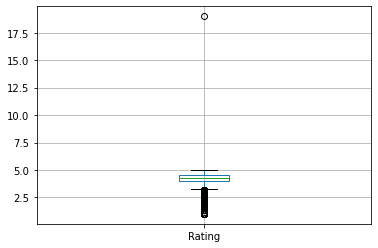

In [6]:
print('Summary of Rating column')
print(df.Rating.describe())
print('\n')
print('In the above summary of the rating column we can see that the max rating is 19 which is an outlier and we can visualize this with a boxplot')
df.boxplot()

In [7]:
# Fill the Rating null values with median rating value
df.Rating.fillna(df.Rating.median(),inplace=True)

In [8]:
# Removing the outliers in Rating field
df[df.Rating>5]
df.drop([10472], inplace = True)

In [9]:
df.Rating.describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [10]:
## Renaming column names for easy access
df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver', 'Android_Ver']

In [11]:
# Before filling null values we have to clean all non numerical values & unicode charachters 
replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df['Current_Ver'] = df['Current_Ver'].astype(str).apply(lambda x : x.replace(i, ''))

    regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df['Current_Ver'] = df['Current_Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current_Ver'] = df['Current_Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current_Ver'] = df['Current_Ver'].fillna(df['Current_Ver'].median())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last_Updated    10840 non-null  object 
 11  Current_Ver     10840 non-null  float64
 12  Android_Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [13]:
## checking missing values 
total = df.isnull().sum().sort_values(ascending = False)
percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100, 2)
pd.concat([total, percent], axis = 1,keys= ['Total', 'Percent'])

,Total,Percent
Android_Ver,2,0.02
Type,1,0.01
Current_Ver,0,0.00
Last_Updated,0,0.00
Genres,0,0.00
Content_Rating,0,0.00
Price,0,0.00
Installs,0,0.00
Size,0,0.00
Reviews,0,0.00


In [14]:
## As we can see that there are only some rows with null values we can drop that row without affecting our analysis
df = df.dropna(how='any',axis=0)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10837 non-null  object 
 1   Category        10837 non-null  object 
 2   Rating          10837 non-null  float64
 3   Reviews         10837 non-null  object 
 4   Size            10837 non-null  object 
 5   Installs        10837 non-null  object 
 6   Type            10837 non-null  object 
 7   Price           10837 non-null  object 
 8   Content_Rating  10837 non-null  object 
 9   Genres          10837 non-null  object 
 10  Last_Updated    10837 non-null  object 
 11  Current_Ver     10837 non-null  float64
 12  Android_Ver     10837 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.00,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.00,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.24,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",0.00,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.10,4.4 and up


### The data is in object type, so converting it into int by making changes in each column

In [17]:
# Reviews column
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [18]:
# Size Column

df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
# Data still in object type, and contain the metric symbol for the perefix, and special size which are "Varies with device" that we need to deal with it.


df['Size'] = df['Size'].replace('Varies with device', np.nan) 

df['Size'] = (df['Size'].replace(r'[kM]+$', '', regex=True).astype(float) * \
             df['Size'].str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

## Replacing those null values of 'varies with device' with the mean value of each category
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'),inplace = True)

In [20]:
# Installs Column

df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [21]:
# Let's change the values from string to number as mentioned below 
# ex: 0 refer to 1+
#     1 refer to 5+
#     2 refer  to 10+

df['Installs'] = [str(i.replace(',','')) for i in df['Installs']]
df['Installs'] = [int(i.replace('+','')) for i in df['Installs']]

In [22]:
# Price Column

df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [23]:
# We convert the data type to float by removing the '$' sign

df['Price'] = [float(i.replace('$','')) for i in df['Price']]

In [24]:
# Content Rating column

df['Content_Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [25]:
'''
Here we will convert the values to integer as mentioned below
'Everyone'        = 0 
'Teen'            = 1 
'Everyone 10+'    = 2
'Mature 17+'      = 3
'Adults only 18+' = 4
'Unrated'         = 5
'''
RatingL = df['Content_Rating'].unique()
RatingDict = {}
for i in range(len(RatingL)):
    RatingDict[RatingL[i]] = i
df['Content_Rating'] = df['Content_Rating'].map(RatingDict).astype(int)

In [26]:
# Genre Column

df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [27]:
# As we can see there are many sub genres, so we will group them into bigger genre by spliting them from ';'

df['Genres'] = df['Genres'].str.split(';').str[0]

In [28]:
df.Genres.value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            390
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   110
Adventure                   91
House & 

In [29]:
# As we can see that there are 2 genres named 'Music' and 'Music & Audio'. So we will group them under one genre named 'Music'

df['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [30]:
# Last Updated column

df['Last_Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [31]:
# "Last Updated" feature is still in Obect type, we need to change it in int for plotting and putting it in the model
#  Let's create a new feature 'updated_days_ago'
# "updated_days_ago" will contain how many days ago was the app last updated w.r.t the latest app update(... days ago).

df['temp_date'] = pd.to_datetime(df['Last_Updated'])
df['updated_days_ago'] = (df['temp_date'] -  df['temp_date'].max()).dt.days
df['updated_days_ago'].head(5)

0   -213
1   -205
2     -7
3    -61
4    -49
Name: updated_days_ago, dtype: int64

In [32]:
# Android Ver Column

df['Android_Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [33]:
# Here to convert the column's dtype to int we make following modifications
# We replace 'Varies with device' with the columns mode
# Also we change the version's to their main versions (eg 4.0.3 and up will be changed to 4, 5.0 - 8.0 will be changed to 5)

df['Android_Ver'] = [str(i.replace('Varies with device',df.Android_Ver.mode()[0])) for i in df['Android_Ver']]
df['Android_Ver'] = [int(i.replace(i,i[0])) for i in df['Android_Ver']]


In [34]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,temp_date,updated_days_ago
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,0,Art & Design,"January 7, 2018",1.00,4,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,0,Art & Design,"January 15, 2018",2.00,4,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,0,Art & Design,"August 1, 2018",1.24,4,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,1,Art & Design,"June 8, 2018",0.00,4,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,0,Art & Design,"June 20, 2018",1.10,4,2018-06-20,-49


# Data Visualization

In [35]:
grp = df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204515
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328205
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

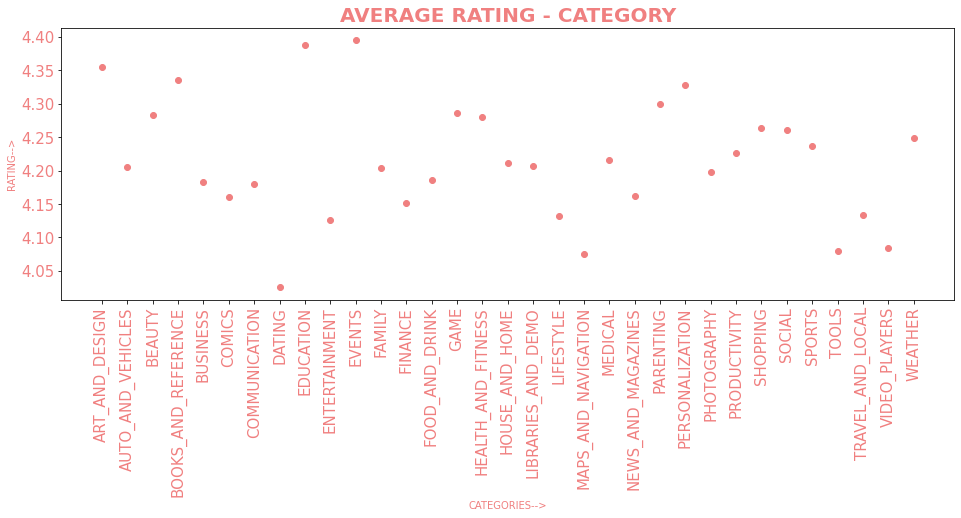

In [36]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro', color='lightcoral')
plt.xticks(fontsize =15, rotation=90, color='lightcoral')
plt.yticks(fontsize =15,color = 'lightcoral')
plt.title('AVERAGE RATING - CATEGORY', color='lightcoral',fontsize=20,fontweight='bold')
plt.xlabel('CATEGORIES-->', color='lightcoral')
plt.ylabel('RATING-->', color='lightcoral')
plt.show()

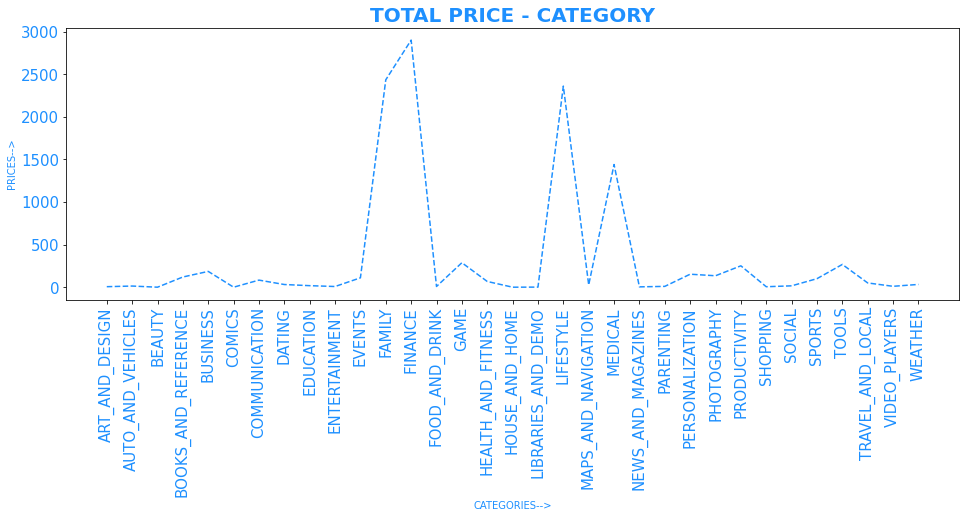

In [37]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='dodgerblue')
plt.xticks(fontsize =15,rotation=90,color='dodgerblue')
plt.yticks(fontsize =15,color = 'dodgerblue')
plt.title('TOTAL PRICE - CATEGORY',color='dodgerblue',fontsize=20,fontweight='bold')
plt.xlabel('CATEGORIES-->',color='dodgerblue')
plt.ylabel('PRICES-->',color='dodgerblue')
plt.show()

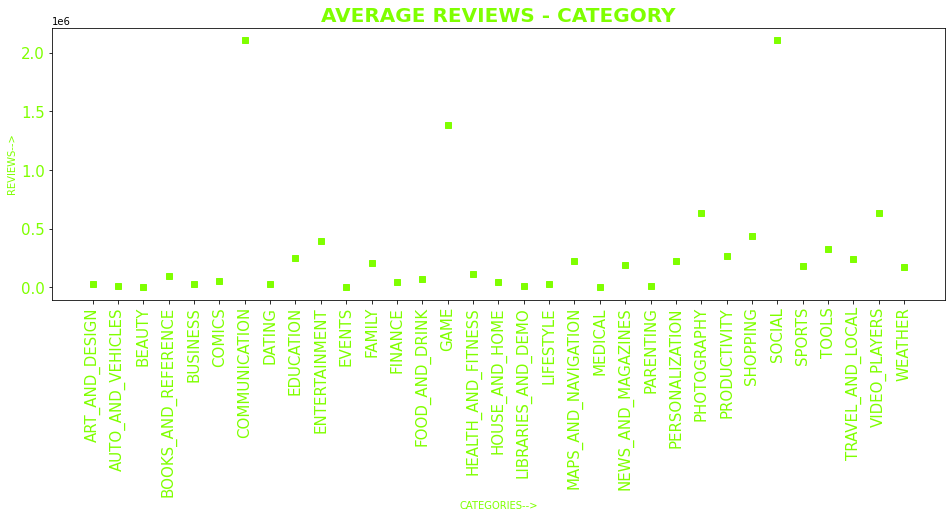

In [44]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='chartreuse')
plt.xticks(fontsize =15,rotation=90, color='chartreuse')
plt.yticks(fontsize =15,color = 'chartreuse')
plt.title('AVERAGE REVIEWS - CATEGORY', color = 'chartreuse',fontsize=20,fontweight='bold')
plt.xlabel('CATEGORIES-->', color = 'chartreuse')
plt.ylabel('REVIEWS-->', color = 'chartreuse')
plt.show()

Text(0.5, 1.0, 'APPLICATIONS IN EACH CATEGORY')

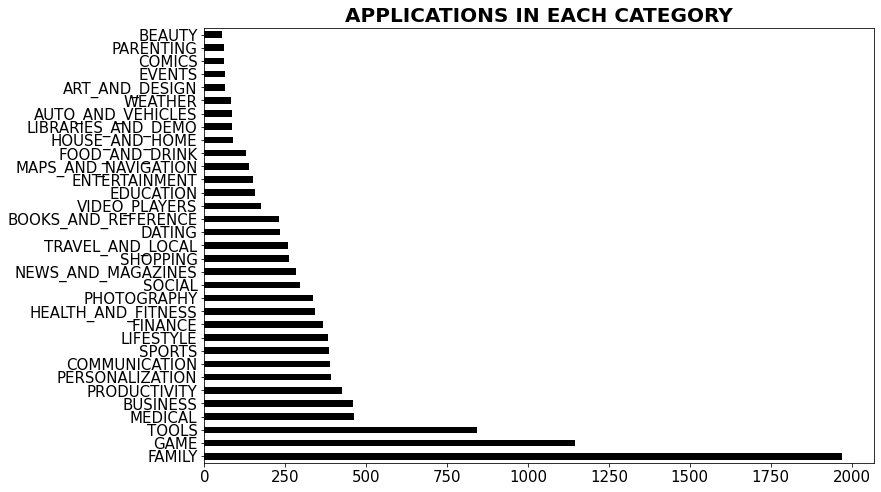

In [45]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8), color = 'black')
plt.xticks(fontsize =15, color='black')
plt.yticks(fontsize =15,color = 'black')
plt.title('APPLICATIONS IN EACH CATEGORY', color = 'black',fontsize=20,fontweight='bold')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App               10837 non-null  object        
 1   Category          10837 non-null  object        
 2   Rating            10837 non-null  float64       
 3   Reviews           10837 non-null  int64         
 4   Size              10837 non-null  float64       
 5   Installs          10837 non-null  int64         
 6   Type              10837 non-null  object        
 7   Price             10837 non-null  float64       
 8   Content_Rating    10837 non-null  int32         
 9   Genres            10837 non-null  object        
 10  Last_Updated      10837 non-null  object        
 11  Current_Ver       10837 non-null  float64       
 12  Android_Ver       10837 non-null  int64         
 13  temp_date         10837 non-null  datetime64[ns]
 14  updated_days_ago  1083

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,temp_date,updated_days_ago
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,0,Art & Design,"January 7, 2018",1.00,4,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,0,Art & Design,"January 15, 2018",2.00,4,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,0,Art & Design,"August 1, 2018",1.24,4,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,1,Art & Design,"June 8, 2018",0.00,4,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,0,Art & Design,"June 20, 2018",1.10,4,2018-06-20,-49


Text(0.5, 1.0, 'DISTRIBUTION OF RATING')

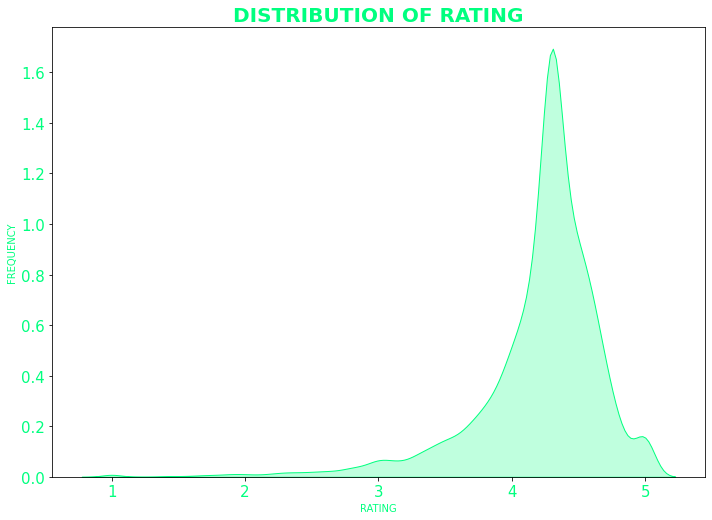

In [48]:
# rating distibution 
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(df.Rating, color="springgreen", shade = True)
g.set_xlabel("RATING",color="springgreen")
g.set_ylabel("FREQUENCY",color="springgreen")
plt.xticks(fontsize =15, color='springgreen')
plt.yticks(fontsize =15,color = 'springgreen')
plt.title('DISTRIBUTION OF RATING',size = 20, color="springgreen",fontweight='bold')

Text(0.5, 1.0, 'APPS BASED ON CATEGORY')

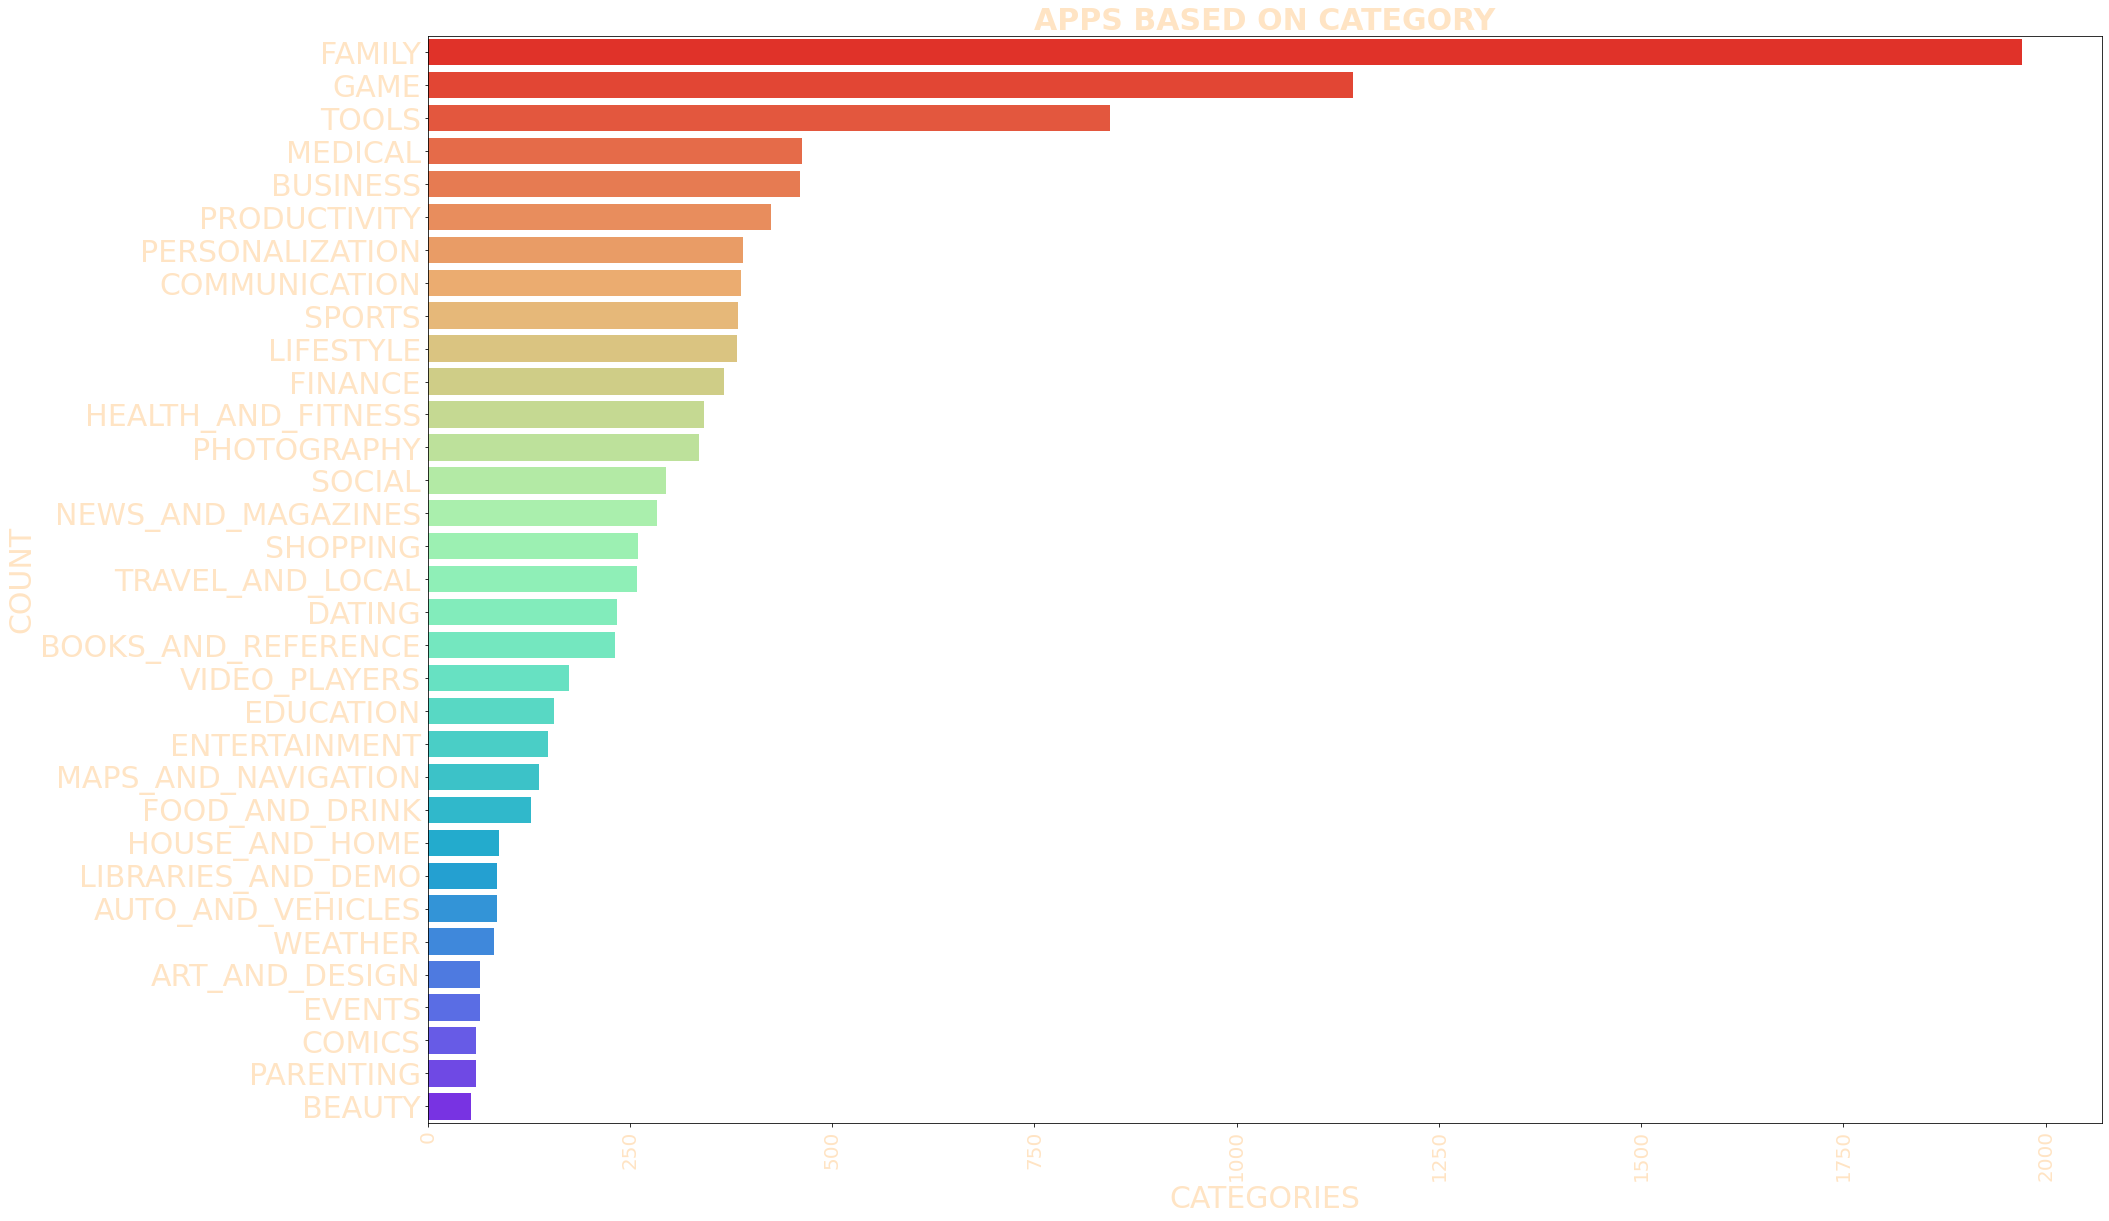

In [49]:
plt.figure(figsize=(30, 20))
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index, palette='rainbow_r')
plt.xticks(rotation=90,color='bisque',fontsize = 20)
plt.yticks(fontsize =30,color = 'bisque')
plt.xlabel('CATEGORIES', fontsize=30,color='bisque')
plt.ylabel('COUNT', fontsize=30,color='bisque')
plt.title('APPS BASED ON CATEGORY', fontsize=30, color='bisque', fontweight = 'bold')

Text(0.5, 1.0, 'AVERAGE RATINGS ACROSS CATEGORY')

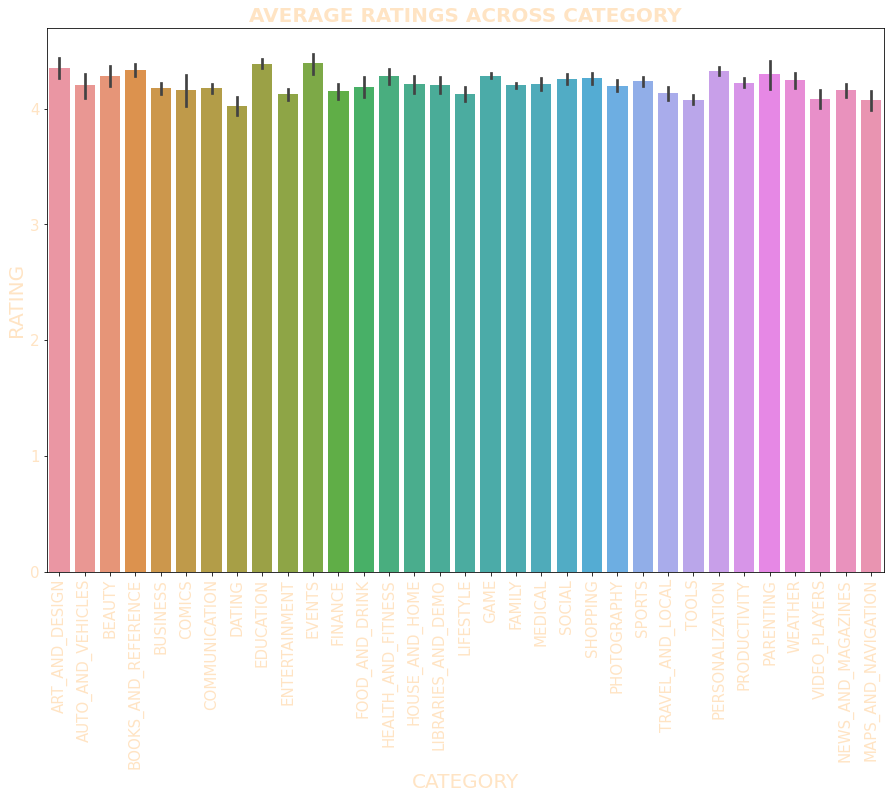

In [50]:
from numpy import mean
plt.figure(figsize=(15, 10))
g = sns.barplot(x="Category", y="Rating", data=df, estimator=mean)
g.set_xticklabels(g.get_xticklabels(),rotation=90, fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("RATING",fontsize = 20,color='bisque')
plt.xlabel("CATEGORY", fontsize = 20,color='bisque')
plt.title('AVERAGE RATINGS ACROSS CATEGORY',size = 20,color='bisque', fontweight = 'bold')

In [51]:
df.groupby(['Category'])['Rating'].mean()

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204515
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328205
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

Text(0.5, 1.0, 'RATING v/s REVIEWS')

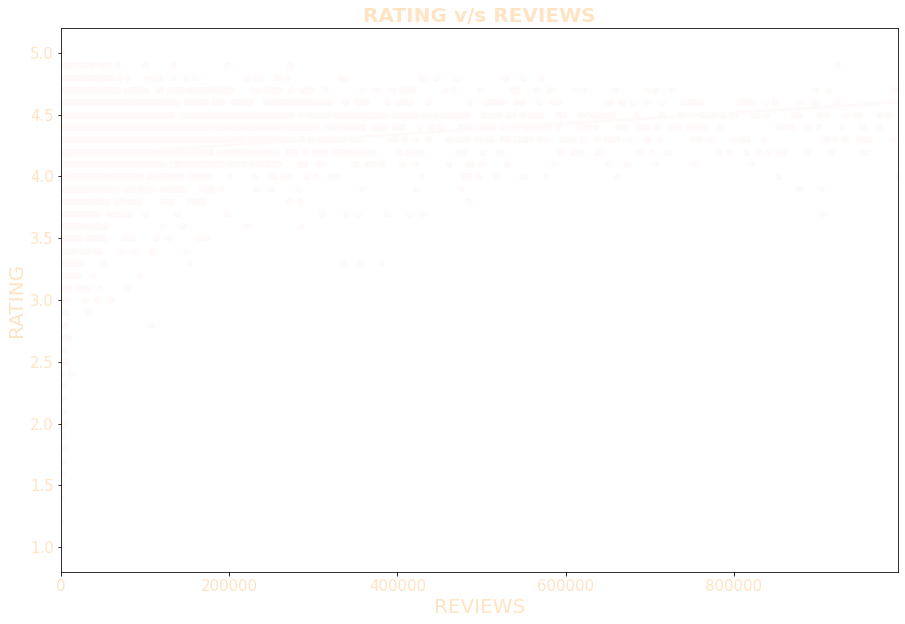

In [52]:
plt.figure(figsize = (15,10))
sns.regplot(x="Reviews", y="Rating", color = 'snow',data=df[df['Reviews']<1000000]);
plt.xticks(fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("RATING",fontsize = 20,color='bisque')
plt.xlabel("REVIEWS", fontsize = 20,color='bisque')
plt.title('RATING v/s REVIEWS',fontsize = 20,color='bisque',fontweight = 'bold')

Text(0.5, 1.0, 'RATIO OF FREE TO PAID APPS IN THE STORE')

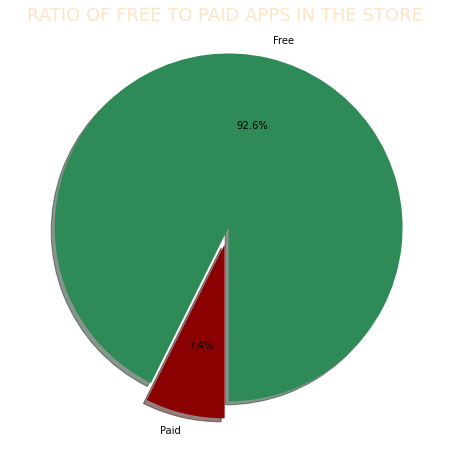

In [53]:
# Data to plot
labels =df['Type'].value_counts(sort = True).index
sizes = df['Type'].value_counts(sort = True)


colors = ["seagreen","darkred"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('RATIO OF FREE TO PAID APPS IN THE STORE',size = 18, color = 'bisque')

Text(0.5, 1.0, 'RATING v/s PRICE')

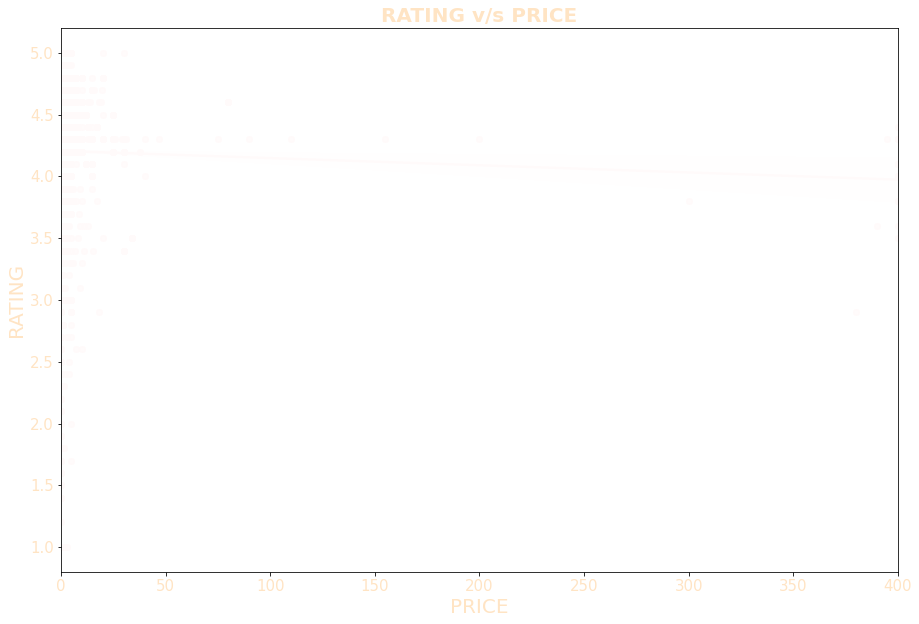

In [54]:
plt.figure(figsize = (15,10))
sns.regplot(x="Price", y="Rating", color = 'snow',data=df);
plt.xticks(fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("RATING",fontsize = 20,color='bisque')
plt.xlabel("PRICE", fontsize = 20,color='bisque')
plt.title('RATING v/s PRICE',size = 20,color='bisque', fontweight = 'bold')

Text(0.5, 1.0, 'RATING v/s SIZE')

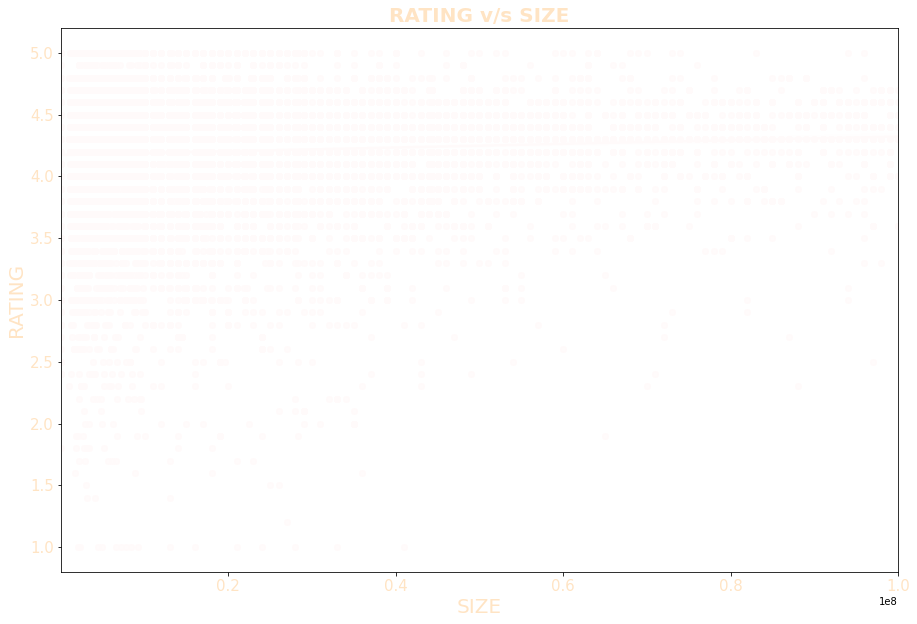

In [55]:
plt.figure(figsize = (15,10))
sns.regplot(x="Size", y="Rating", color = 'snow',data=df);
plt.xticks(fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("RATING",fontsize = 20,color='bisque')
plt.xlabel("SIZE", fontsize = 20,color='bisque')
plt.title('RATING v/s SIZE',size = 20,color='bisque', fontweight = 'bold')

Text(0.5, 1.0, 'RATING v/s INSTALLS')

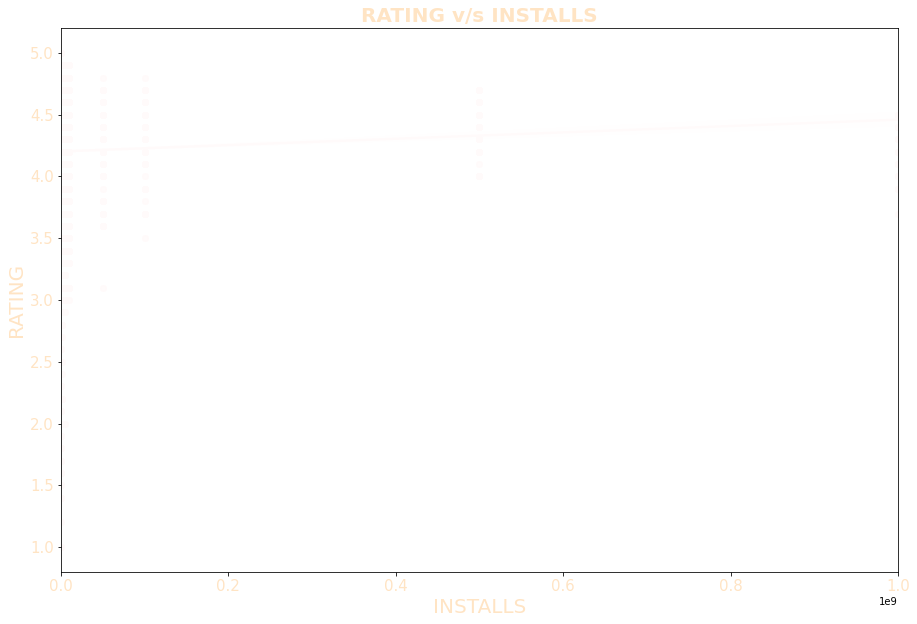

In [56]:
plt.figure(figsize = (15,10))
sns.regplot(x="Installs", y="Rating", color = 'snow',data=df);
plt.xticks(fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("RATING",fontsize = 20,color='bisque')
plt.xlabel("INSTALLS", fontsize = 20,color='bisque')
plt.title('RATING v/s INSTALLS',size = 20,color='bisque', fontweight = 'bold')

Text(0.5, 1.0, 'Rating v/s Content Rating')

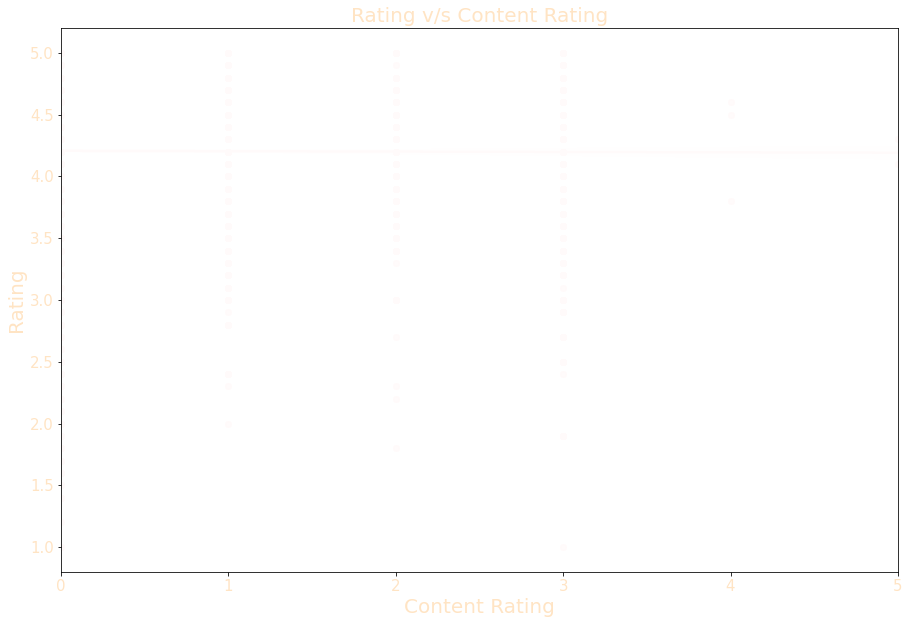

In [57]:
plt.figure(figsize = (15,10))
sns.regplot(x="Content_Rating", y="Rating", color = 'snow',data=df);
plt.xticks(fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("Rating",fontsize = 20,color='bisque')
plt.xlabel("Content Rating", fontsize = 20,color='bisque')
plt.title('Rating v/s Content Rating',size = 20,color='bisque')

Text(0.5, 1.0, 'Rating v/s Updated days ago')

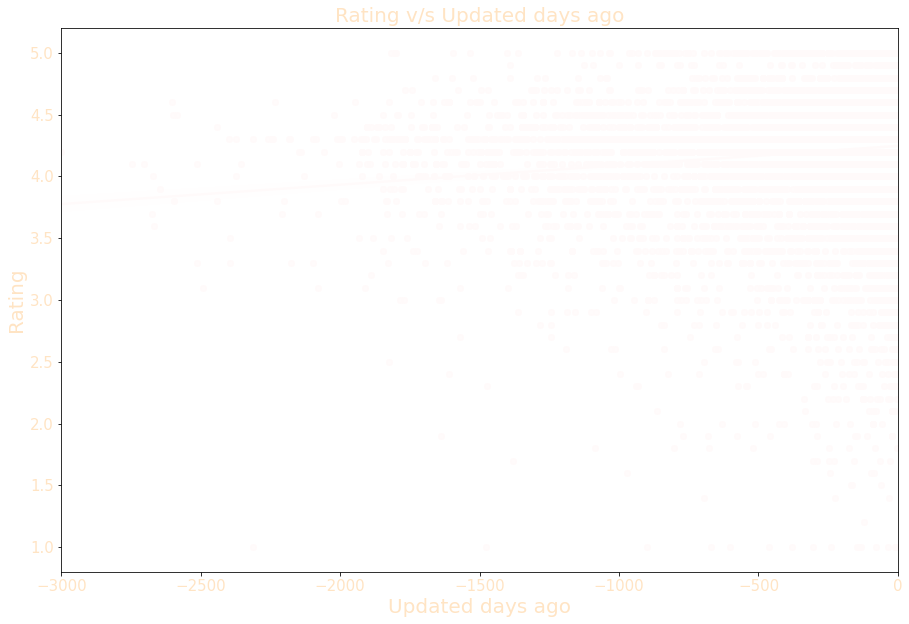

In [58]:
plt.figure(figsize = (15,10))
sns.regplot(x="updated_days_ago", y="Rating", color = 'snow',data=df);
plt.xticks(fontsize = 15,color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("Rating",fontsize = 20,color='bisque')
plt.xlabel("Updated days ago", fontsize = 20,color='bisque')
plt.title('Rating v/s Updated days ago',size = 20,color='bisque')

Text(0.5, 1.0, 'Rating VS Android Version')

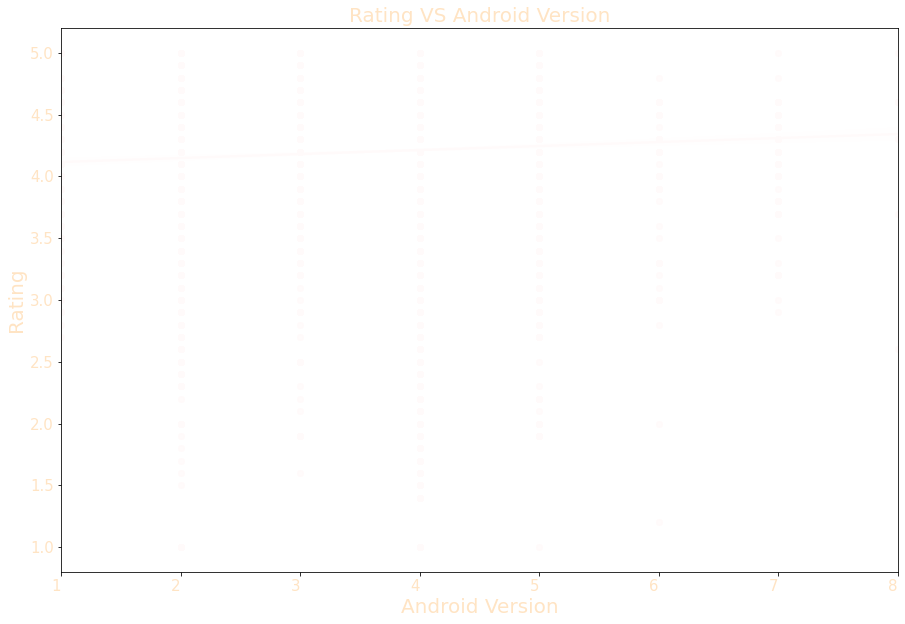

In [59]:
plt.figure(figsize = (15,10))
sns.regplot(x="Android_Ver", y="Rating", color = 'snow',data=df);
plt.xticks(fontsize = 15, rotation = 0, horizontalalignment='right',color='bisque')
plt.yticks(fontsize =15,color='bisque')
plt.ylabel("Rating",fontsize = 20,color='bisque')
plt.xlabel("Android Version", fontsize = 20,color='bisque')
plt.title('Rating VS Android Version',size = 20,color='bisque')

# Modelling

##### First we prepare the data for our model by dropping the features that will hinder our model's performance

In [60]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,temp_date,updated_days_ago
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,0,Art & Design,"January 7, 2018",1.00,4,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,0,Art & Design,"January 15, 2018",2.00,4,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,0,Art & Design,"August 1, 2018",1.24,4,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,1,Art & Design,"June 8, 2018",0.00,4,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,0,Art & Design,"June 20, 2018",1.10,4,2018-06-20,-49


In [61]:

final_features_df = df
final_features_df.drop(['App','Price','Last_Updated','Content_Rating','Android_Ver','temp_date'],axis=1,inplace=True)


In [62]:
final_features_df.head()

,Category,Rating,Reviews,Size,Installs,Type,Genres,Current_Ver,updated_days_ago
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,Art & Design,1.00,-213
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,Art & Design,2.00,-205
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,Art & Design,1.24,-7
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,Art & Design,0.00,-61
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,Art & Design,1.10,-49


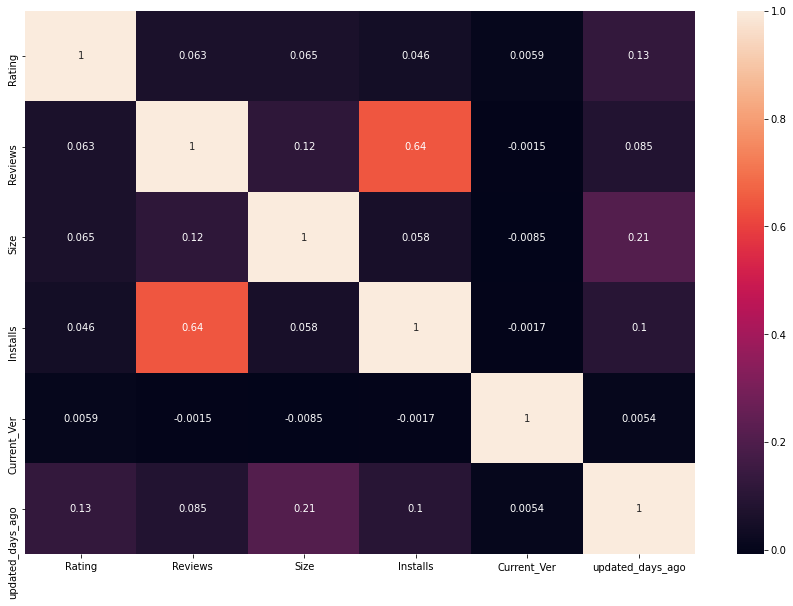

In [63]:
# Plotting the correlation graph

plt.figure(figsize=(15,10))
sns.heatmap(final_features_df.corr(),annot=True)
plt.show()

In [64]:
final_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          10837 non-null  object 
 1   Rating            10837 non-null  float64
 2   Reviews           10837 non-null  int64  
 3   Size              10837 non-null  float64
 4   Installs          10837 non-null  int64  
 5   Type              10837 non-null  object 
 6   Genres            10837 non-null  object 
 7   Current_Ver       10837 non-null  float64
 8   updated_days_ago  10837 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.1+ MB


In [65]:
# Using one hot encoding for categorical data
category=pd.get_dummies(final_features_df['Category'],prefix='CAT',drop_first=True)
typ=pd.get_dummies(final_features_df['Type'],prefix='TYPE',drop_first=True)
genre=pd.get_dummies(final_features_df['Genres'],prefix='GEN',drop_first=True)

one_hot_encoded_df=[final_features_df,category,typ,genre]
final_features_df=pd.concat(one_hot_encoded_df,axis=1)
final_features_df.drop(['Category','Type','Genres'],axis=1,inplace=True)

In [66]:
final_features_df.head()

,Rating,Reviews,Size,Installs,Current_Ver,updated_days_ago,CAT_AUTO_AND_VEHICLES,CAT_BEAUTY,CAT_BOOKS_AND_REFERENCE,CAT_BUSINESS,CAT_COMICS,CAT_COMMUNICATION,CAT_DATING,CAT_EDUCATION,CAT_ENTERTAINMENT,CAT_EVENTS,CAT_FAMILY,CAT_FINANCE,CAT_FOOD_AND_DRINK,CAT_GAME,CAT_HEALTH_AND_FITNESS,CAT_HOUSE_AND_HOME,CAT_LIBRARIES_AND_DEMO,CAT_LIFESTYLE,CAT_MAPS_AND_NAVIGATION,...,GEN_House & Home,GEN_Libraries & Demo,GEN_Lifestyle,GEN_Maps & Navigation,GEN_Medical,GEN_Music,GEN_News & Magazines,GEN_Parenting,GEN_Personalization,GEN_Photography,GEN_Productivity,GEN_Puzzle,GEN_Racing,GEN_Role Playing,GEN_Shopping,GEN_Simulation,GEN_Social,GEN_Sports,GEN_Strategy,GEN_Tools,GEN_Travel & Local,GEN_Trivia,GEN_Video Players & Editors,GEN_Weather,GEN_Word
0,4.1,159,19000000.0,10000,1.00,-213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,2.00,-205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,1.24,-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0.00,-61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,1.10,-49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Now we split the data into training and testing set
##### Also we will scale the data using StandardScaler

In [67]:
final_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 85 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rating                       10837 non-null  float64
 1   Reviews                      10837 non-null  int64  
 2   Size                         10837 non-null  float64
 3   Installs                     10837 non-null  int64  
 4   Current_Ver                  10837 non-null  float64
 5   updated_days_ago             10837 non-null  int64  
 6   CAT_AUTO_AND_VEHICLES        10837 non-null  uint8  
 7   CAT_BEAUTY                   10837 non-null  uint8  
 8   CAT_BOOKS_AND_REFERENCE      10837 non-null  uint8  
 9   CAT_BUSINESS                 10837 non-null  uint8  
 10  CAT_COMICS                   10837 non-null  uint8  
 11  CAT_COMMUNICATION            10837 non-null  uint8  
 12  CAT_DATING                   10837 non-null  uint8  
 13  CAT_EDUCATION   

In [68]:
X=final_features_df.drop('Rating',axis=1)
y=final_features_df['Rating'].values
y= y.astype('int')

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=28)

In [70]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# Decision Tree

In [71]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=2)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

In [72]:
print('DecisionTree_Classifier_accuracy:',dtree_ac)
print("The F1 score is: ", f1_score(y_test, dtree_pred, average="macro"))
print("The Precision score is: ",precision_score(y_test, dtree_pred, average="macro"))
print("The Recall score is: ",recall_score(y_test, dtree_pred, average="macro"))

DecisionTree_Classifier_accuracy: 0.7084870848708487
The F1 score is:  0.3120687420659932
The Precision score is:  0.3112558421140025
The Recall score is:  0.31392880844054044


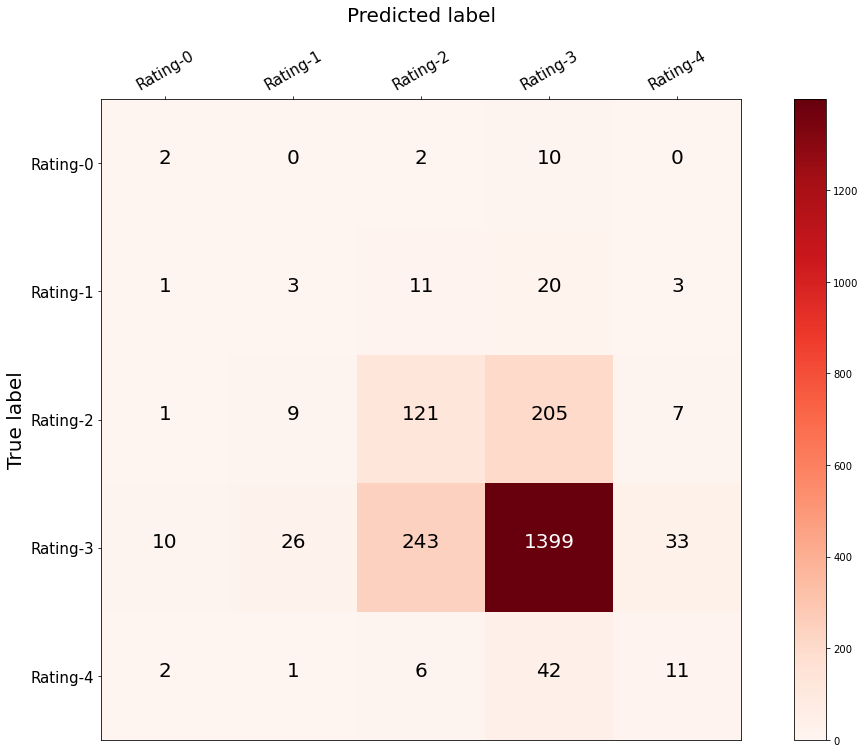

In [73]:
class_names = ['Rating-0','Rating-1','Rating-2','Rating-3','Rating-4']
matrix = confusion_matrix(y_test,dtree_pred)

plt.figure(figsize=(15,10))
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Reds)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center", fontsize = 20,
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=30, fontsize = 15)
plt.yticks(tick_marks, class_names, fontsize = 15)
plt.tight_layout()
plt.ylabel('True label',size=20)
plt.xlabel('Predicted label\n',size=20)
plt.show()

In [74]:
# Grid Search for Decision Tree
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(5,10)), 'min_samples_leaf': list(range(5,10)), 'max_leaf_nodes': list(range(5,10))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 125 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    9.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_leaf_nodes': [5, 6, 7, 8, 9],
                         'min_samples_leaf': [5, 6, 7, 8, 9]},
             verbose=1)

In [75]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, min_samples_leaf=5,
                       random_state=42)

DecisionTree_Classifier_accuracy: 0.7892066420664207
The F1 score is:  0.17643722608919826
The Precision score is:  0.15784132841328413
The Recall score is:  0.2

Decision Tree Confusion Matrix


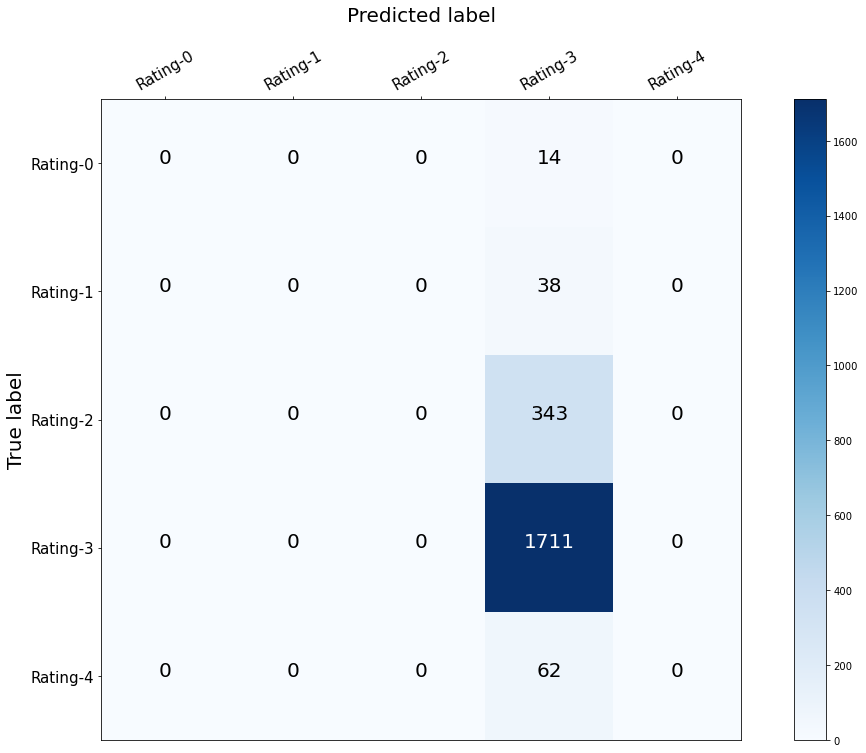

In [76]:
# Using the best parameters obtained from grid search

dtree_c=DecisionTreeClassifier(criterion='gini', max_depth=5 , max_leaf_nodes=5,min_samples_leaf=5, min_samples_split=2, random_state=2)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

print('DecisionTree_Classifier_accuracy:',dtree_ac)
print("The F1 score is: ", f1_score(y_test, dtree_pred, average="macro"))
print("The Precision score is: ",precision_score(y_test, dtree_pred, average="macro"))
print("The Recall score is: ",recall_score(y_test, dtree_pred, average="macro"))

print('\nDecision Tree Confusion Matrix')
class_names = ['Rating-0','Rating-1','Rating-2','Rating-3','Rating-4']
matrix = confusion_matrix(y_test,dtree_pred)

plt.figure(figsize=(15,10))
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center", fontsize = 20,
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=30, fontsize = 15)
plt.yticks(tick_marks, class_names, fontsize = 15)
plt.tight_layout()
plt.ylabel('True label',size=20)
plt.xlabel('Predicted label\n',size=20)
plt.show()

# Random Forest 

In [77]:
# Initiate the model and fit on the training set
from sklearn.ensemble import RandomForestClassifier
rdf_c=RandomForestClassifier(n_estimators=50,criterion='entropy',random_state=24)
rdf_c.fit(X_train,y_train)


# Perform prediction and generate confusion matrix and accuracy score
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [78]:
# Print the necessary metrics
print('The accuracy of the model is:',rdf_ac)
print("The F1 score is: ", f1_score(y_test, rdf_pred, average="macro"))
print("The Precision score is: ",precision_score(y_test, rdf_pred, average="macro"))
print("The Recall score is: ",recall_score(y_test, rdf_pred, average="macro")) 


The accuracy of the model is: 0.8007380073800738
The F1 score is:  0.31141001968000204
The Precision score is:  0.491945863848738
The Recall score is:  0.2806979046440885


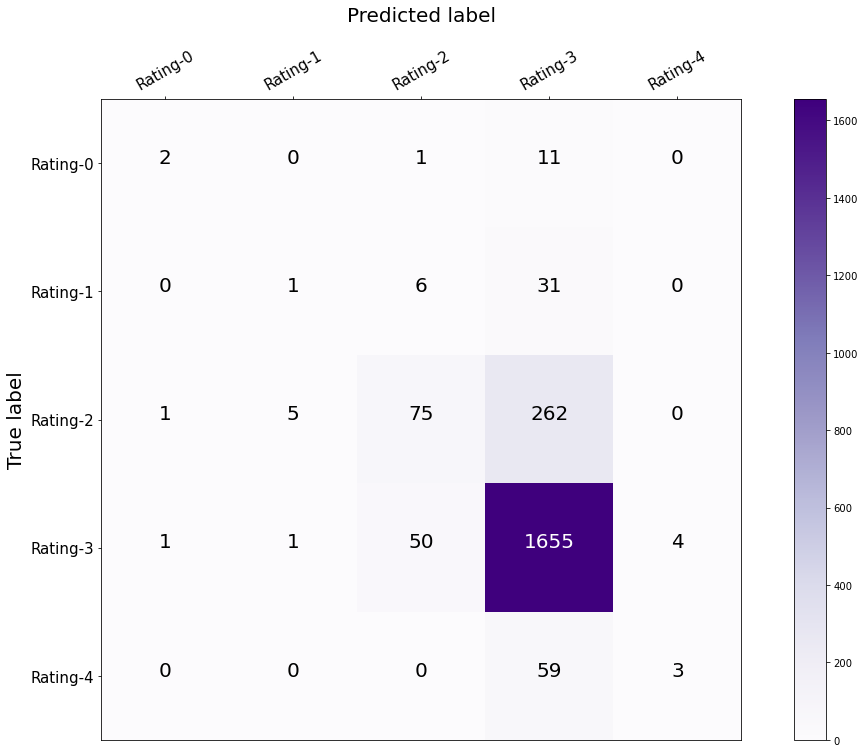

In [79]:
class_names = ['Rating-0','Rating-1','Rating-2','Rating-3','Rating-4']
matrix = confusion_matrix(y_test,rdf_pred)

plt.figure(figsize=(15,10))
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Purples)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center", fontsize = 20,
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=30, fontsize = 15)
plt.yticks(tick_marks, class_names, fontsize = 15)
plt.tight_layout()
plt.ylabel('True label',size=20)
plt.xlabel('Predicted label\n',size=20)
plt.show()

# KNN Classifier

In [80]:
#Initiate Model and Inspect Base Parameters:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [82]:
#Create Grid Search Parameters based on Parameters:
random_grid = {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size': [30, 40, 50, 60, 70, 80, 90, 100],
               'p': [1, 2],
               'n_neighbors': [4, 5, 6, 7, 8]
               }

In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
#Set GridSearch Using RandomizedSearchCV:
kfold = KFold(n_splits=20, random_state=42)
model_random = RandomizedSearchCV(estimator=KNN,
                                  param_distributions=random_grid,
                                  n_iter=100,
                                  cv=kfold,
                                  verbose=1,
                                  random_state=42,
                                  scoring="accuracy",
                                  n_jobs=4)

In [ ]:
#Fit Model with RandomizedSearchGrid:
start_time = pd.Timestamp.today()
model_random.fit(X_train,y_train)
end_time = pd.Timestamp.today()
print("Executed in: {}".format(end_time - start_time))

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   38.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  1.5min


In [ ]:
# Perform prediction and generate confusion matrix and accuracy score
knn_pred=model_random.predict(X_test)
knn_cm=confusion_matrix(y_test,knn_pred)
knn_ac=accuracy_score(knn_pred,y_test)

In [ ]:
# Print the necessary metrics
print('The accuracy of the model is:',knn_ac)
print("The F1 score is: ", f1_score(y_test, knn_pred, average="macro"))
print("The Precision score is: ",precision_score(y_test, knn_pred, average="macro"))
print("The Recall score is: ",recall_score(y_test, knn_pred, average="macro")) 

In [ ]:
class_names = ['Rating-0','Rating-1','Rating-2','Rating-3','Rating-4']
matrix = confusion_matrix(y_test,knn_pred)

plt.figure(figsize=(15,10))
plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=30, fontsize = 15)
plt.yticks(tick_marks, class_names, fontsize = 15)
plt.tight_layout()
plt.ylabel('True label',size=20)
plt.xlabel('Predicted label\n',size=20)
plt.show()